<a href="https://colab.research.google.com/github/jamunozlab/planetary_science_spring_2024/blob/main/mini_project_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kepler exoplanets

Kepler-10b is the first rocky planet detected by the Kepler Space Telescope, a NASA mission launched in March 2009 and deactivated in November 2018. Kepler-10b has been confirmed by the W. M. Keck Telescope in Hawaii. It orbits the star Kepler-10.

In this mini project, you will download and analyze the light intensity measurements from Kepler that led to the detection of Kepler-10b. The packages and the code needed to perform the analysis are provided, but you are asked to qualitatively explain what the analysis methods do to the data. You are also asked to provide a quantitative estimate of the radius of Kepler-10b and explore data for star Kepler-20.

For a quick introduction to Kepler and Kepler-10, watch this [YouTube video](https://www.youtube.com/watch?v=S5ZJEiGOHTo). The diagram below shows that the planet is likely mostly iron.

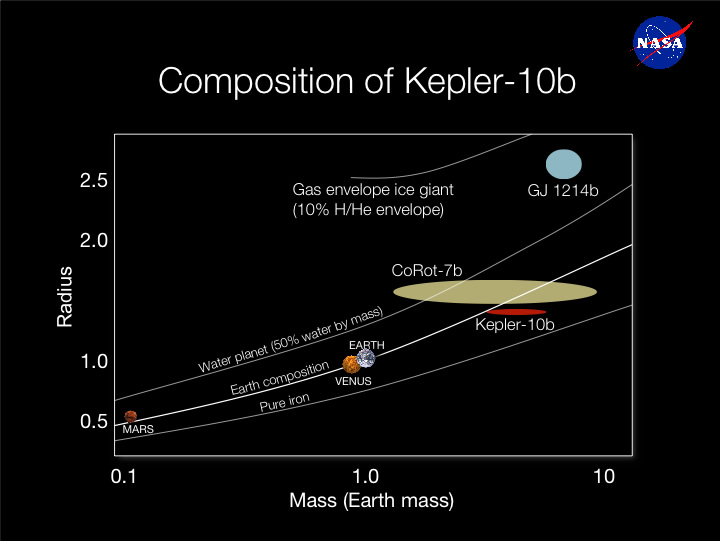.

In [ ]:
# Cell 0
# Evaluate this cell to download and install ligthkurve
# This will be used to access and manipulated Kepler data
# You will see a bunch of messages, worry you must not
# It is only temporarily intalled on your Google Drive (not local machine)
! python -m pip install lightkurve --upgrade

In [ ]:
# Cell 1
# Import the packages we need for this mini project
import lightkurve as lk
import numpy as np
import matplotlib as plt
import pandas as pd

In [ ]:
# Cell 2
# Download the data for star Kepler-10
# The data is stored in a variable called "data"
# Kindly ignore warning messages
data = lk.search_targetpixelfile("Kepler-10", author="Kepler", cadence="long").download()

In [ ]:
# Cell 3
# Plot a single frame (snapshot) of kepler-10
# Look at different frames and determine whether there are differences
# What are the units?
data.plot(frame=50, scale='log', show_colorbar=True);

In [ ]:
# Cell 4
# The aperture information is part of the data you downloaded
# It is store in the variable "data.pipeline_mask"
# What does the method "to_lightcurve()" do to the data?
lc = data.to_lightcurve(aperture_mask=data.pipeline_mask)
lc.plot();

In [ ]:
# Cell 5
# "flatten()" is a method to make the data smoother using a Savitzky–Golay filter
# This increases the precision without distorting the signal
# The red line shows the smoothed out data
# Run this part of the code with different values of the parameter "window_length"
# What qualitative and quantitative differences does it make on your analysis?
flat, trend = lc.flatten(window_length=51, return_trend=True)
ax = lc.errorbar(label="Kepler-10")
trend.plot(ax=ax, color='red', lw=2, label='Trend');

In [ ]:
# Cell 6
# The variable "flat" holds the difference between the raw data and the trend
# What do the dips in flux represent?
pd.Series(flat.flux, index=flat.time).plot(ylim=(0.9995, 1.0005), ylabel="Flux [e-/s]", xlabel="Time [days]")

In [ ]:
# Cell 7
# The variable "flat" also holds the error bars
flat.errorbar(label="Kepler-10");

In [ ]:
# Cell 8
# "to_periodogram()" is a method to transform time series data into a power spectrum
# What is a power spectrum? Why is this useful to detect transiting exoplanets?
# The Box Least Squares (BLS) method is used to generate the power spectrum
# Describe qualitatively the mechanics and function of BLS
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.4, 1.8, 0.001))
periodogram.plot();

In [ ]:
# Cell 9
# The period at the maximum power is stored in "periodogram.period_at_max_power"
# For simplicity, we store this value in the variable "best_fit_period"
# Explain the location of the other peaks in the power spectrum
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

In [ ]:
# Cell 10
# The "fold()" method folds the data with a given periodicity, in this "case best_fit_period"
# This makes the visualization of the light intensity dip fairly easy
# What happens when you modify the value of the argument "period"?
flat.fold(period=best_fit_period, epoch_time=periodogram.transit_time_at_max_power).errorbar();

# Instructions

Run the whole notebook. An easy way to do this by going the "Runtime" scroll-down menu in the upper left part of the colab notebook, then clicking on "Run all." Then answer the questions below. Turn in a hardcopy of your work.

# Questions

1. The code in cell 3 plots flux per pixel for a given instant (originally frame=50). Change this value to investigate how the star looks like at different times. Describe qualitatively any differences or state that there are no differences. In this context, what does flux refer to?

2. In code cell 4, a method is applied to the data that transforms it from an intensity per pixel heatmap to a flux vs time plot. Describe qualitatively what the method is doing to the data.

3. In code cell 5, the flux vs time data is smoothed out using a [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter). In this context, what is a filter? Describe qualitatively what a Savitzky–Golay filter does specifically.

4. One of the parameters of the Savitzky–Golay filter is the window length (originally window_length=51). Change the value of this parameter several times (make sure that the parameter is always an odd integer) and describe quantitatively what the effect is on the smoothing.

5. Explain the data created by code cell 6. Why does the time series seem to be centered around flux = 0 e$^-$/s. What do the periodic dips represent?

6. Ditto as above but for code cell 7.

7. The code in cell 8 produces a power spectrum using the [box least squares](https://docs.astropy.org/en/stable/timeseries/bls.html). What is a power spectrum? Describe qualitatively what the box least squares method does specifically.

8. The code in cell 9 gives the centroid of the peak in the power spectrum with the highest intensity, which in this case is 0.838 days. What does this number represent? Provide arguments to back up your answer. Why are there peaks in the power spectrum separated by a bit over 0.4 days?

9. The code in cell 10 generates a plot. What does this plot represent? How many dips do you observe in the plot and how severe? If you were to draw a box approximately around the dip, what would be the length and width of the box?

10. The star Kepler-10 has a radius of 1.065 $R_\odot$ (where the solar radius $R_\odot$ = 6.95700 $\times 10^8$ meters). Based on the normalized flux plot above, what is the radius of planet Kepler-10b? Assume that both Kepler-10 and Kepler-10b are disks.

11. Finally, repeat all the analysis for a different star: kepler-20. Do not worry, you just have to change the name in cell 2 from "kepler-10" to "kepler-20" and re-evaluate all the cells. Look at the plots produced by cells 6 and 7. What are the similiraties and differences between the plots for kepler-10 and kepler-20? Why do you think they arise?

Here is another [YouTube video](https://www.youtube.com/watch?v=8_k3SoNSgYo) about the Kepler-10 system, including all the planets. Below you can see an artist's rendition of Kepler-20 planets. Enjoy!

 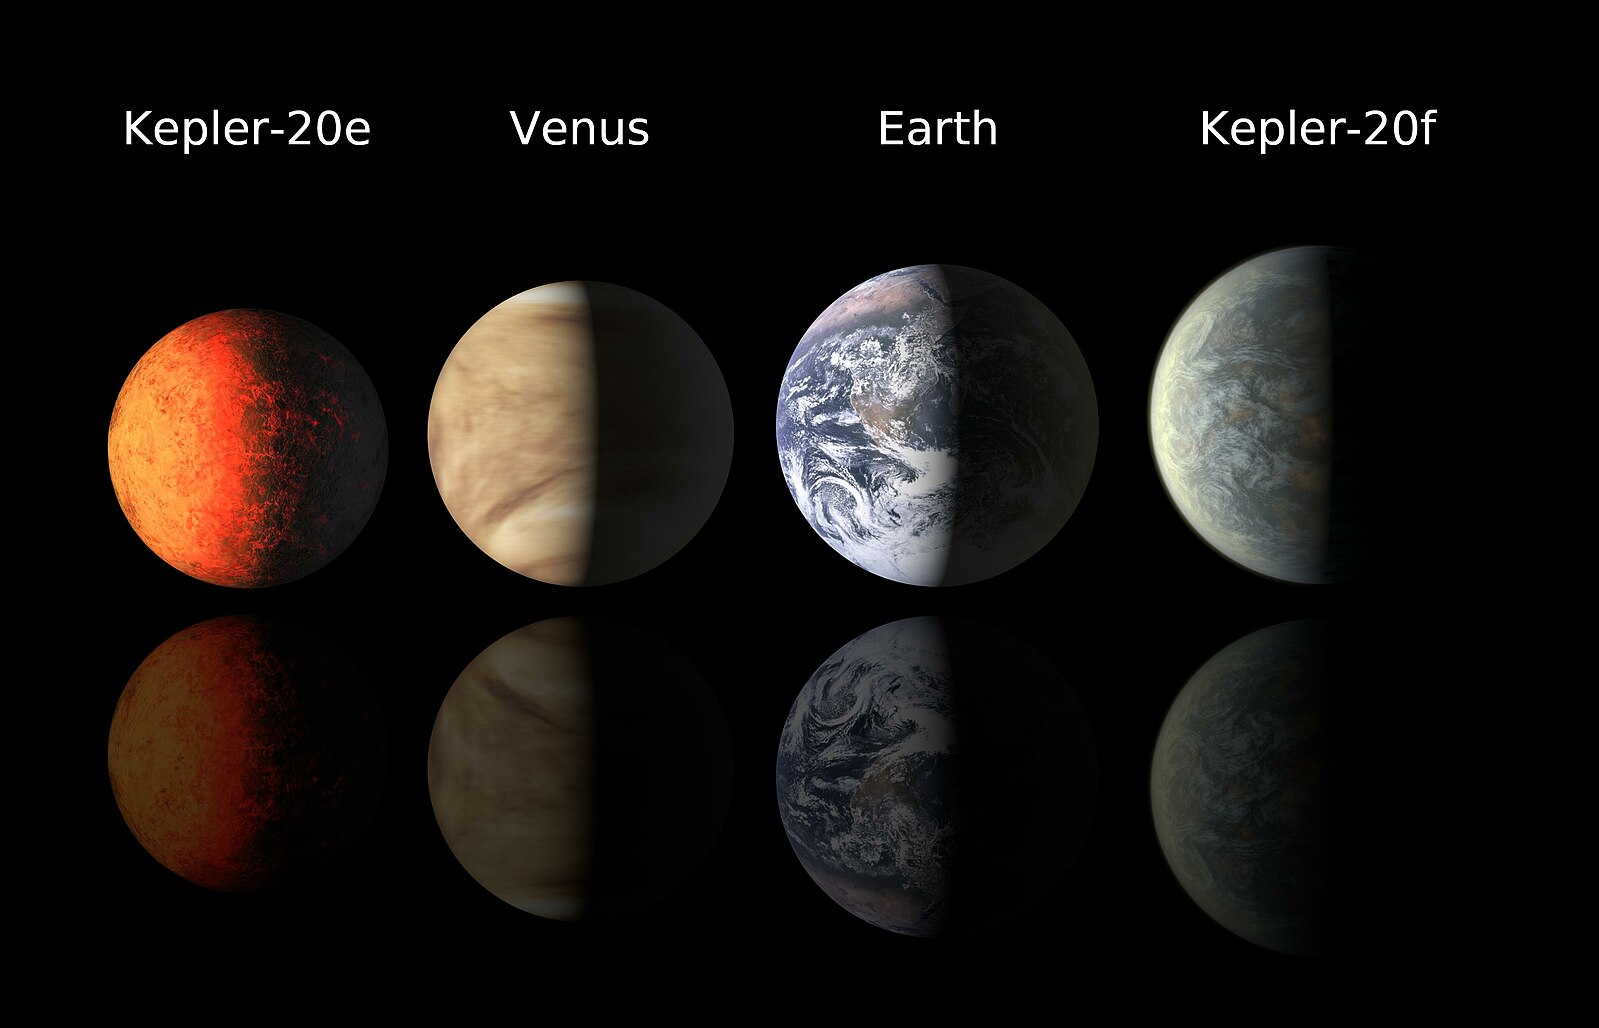